<a href="https://colab.research.google.com/github/7rohj/NLI-contest-/blob/main/%5BDACON%5D_%ED%95%9C%EA%B5%AD%EC%96%B4_%EB%AC%B8%EC%9E%A5_%EA%B4%80%EA%B3%84_%EB%B6%84%EB%A5%98_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2022.01.28 ~ 2022.02.28 진했었던 대회 참가 코드 정리 📖

#### **데이터 불러오기 및 EDA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("data_dir/train_data.csv") # 나중에 train 과 val 데이터로 나눠줌
test = pd.read_csv("data_dir/test_data.csv")

In [3]:
train.shape

(24998, 4)

In [4]:
train.isnull().sum()

index         0
premise       0
hypothesis    0
label         0
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       24998 non-null  int64 
 1   premise     24998 non-null  object
 2   hypothesis  24998 non-null  object
 3   label       24998 non-null  object
dtypes: int64(1), object(3)
memory usage: 781.3+ KB


In [6]:
train.dtypes

index          int64
premise       object
hypothesis    object
label         object
dtype: object

In [7]:
train.groupby(by=['label']).count()

,index,premise,hypothesis
label,,,
contradiction,8489,8489,8489
entailment,8561,8561,8561
neutral,7948,7948,7948


In [8]:
test_df = test

#### **데이터 전처리**

온점 없애줌

In [9]:
# 정규 표현식 함수 정의
train['premise'] = train['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test['premise'] = test['premise'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")

train['hypothesis'] = train['hypothesis'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test['hypothesis'] = test['hypothesis'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
train.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,index,premise,hypothesis,label
0,0,씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서 소년이나 장정들이 ...,씨름의 여자들의 놀이이다,contradiction
1,1,삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나 ...,자작극을 벌인 이는 3명이다,contradiction
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다,entailment
3,3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다,neutral
4,4,진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면 이런 상황에서는 ...,이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다,neutral


In [10]:
# 정규 표현식 함수 정의

import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

##### **띄어쓰기 및 오탈자 수정**

데이터를 탐색해보니 띄어쓰기가 엉터리인 경우도 있고, ~함, ~음 처럼 줄임말도 포함되어 있음.

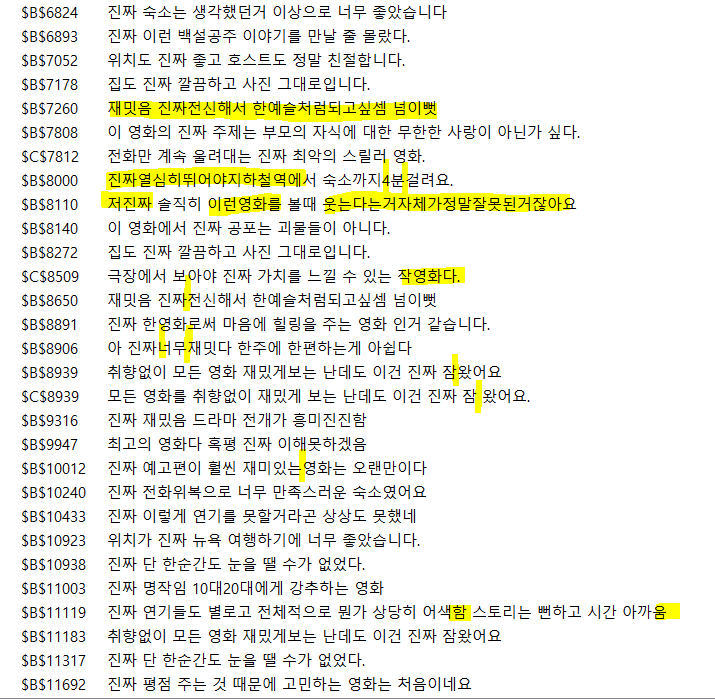

채팅체로 쓰여진 한국어 문장을 문법에 맞는 문장으로 바꾸어주는 모듈입니다. <br/>
https://github.com/seoyoungh/ko-chat-checker

빠른 속도와 준수한 정확도를 목표로하는 한국어 띄어쓰기 교정 모델입니다.<br/>
https://github.com/cosmoquester/quickspacer

네이버 맞춤법 검사 api 활용 파이썬 라이브러리 문닫음 <br>
스캐터랩에서 개발한 chatspace 없어짐 <br>

In [ ]:
! pip install quickspacer

In [11]:
! pip install customized_konlpy

     |████████████████████████████████| 881 kB 7.7 MB/s 
     |████████████████████████████████| 448 kB 40.9 MB/s 
     |████████████████████████████████| 19.4 MB 29.8 MB/s 


#### **Okt**

In [16]:
from konlpy.tag import Okt
from collections import Counter

In [19]:
okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(apply_regular_expression(train['premise'][0]))
nouns

['씨름',
 '상고',
 '시대',
 '로부터',
 '남자',
 '대표',
 '놀이',
 '로서',
 '소년',
 '장정',
 '사장',
 '마당',
 '서로',
 '힘',
 '슬기',
 '것']

In [20]:
print(okt.morphs(train['premise'][0])) #형태소별로 나눔

['씨름', '은', '상고', '시대', '로부터', '전해져', '내려오는', '남자', '들', '의', '대표', '적', '인', '놀이', '로서', '소년', '이나', '장정', '들', '이', '넓고', '평평한', '백', '사장', '이나', '마당', '에서', '모여', '서로', '힘', '과', '슬기', '를', '겨루는', '것', '이다']


In [21]:
print(okt.pos(train['premise'][0])) # 각 단어의 품사 태깅해줌

[('씨름', 'Noun'), ('은', 'Josa'), ('상고', 'Noun'), ('시대', 'Noun'), ('로부터', 'Noun'), ('전해져', 'Verb'), ('내려오는', 'Verb'), ('남자', 'Noun'), ('들', 'Suffix'), ('의', 'Josa'), ('대표', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('놀이', 'Noun'), ('로서', 'Noun'), ('소년', 'Noun'), ('이나', 'Josa'), ('장정', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('넓고', 'Adjective'), ('평평한', 'Adjective'), ('백', 'Modifier'), ('사장', 'Noun'), ('이나', 'Josa'), ('마당', 'Noun'), ('에서', 'Josa'), ('모여', 'Verb'), ('서로', 'Noun'), ('힘', 'Noun'), ('과', 'Josa'), ('슬기', 'Noun'), ('를', 'Josa'), ('겨루는', 'Verb'), ('것', 'Noun'), ('이다', 'Josa')]


In [22]:
print(okt.pos(train['premise'][0],norm=True,stem=True)) # norm => 되나요 => 되다

[('씨름', 'Noun'), ('은', 'Josa'), ('상고', 'Noun'), ('시대', 'Noun'), ('로부터', 'Noun'), ('전해지다', 'Verb'), ('내려오다', 'Verb'), ('남자', 'Noun'), ('들', 'Suffix'), ('의', 'Josa'), ('대표', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('놀이', 'Noun'), ('로서', 'Noun'), ('소년', 'Noun'), ('이나', 'Josa'), ('장정', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('넓다', 'Adjective'), ('평평하다', 'Adjective'), ('백', 'Modifier'), ('사장', 'Noun'), ('이나', 'Josa'), ('마당', 'Noun'), ('에서', 'Josa'), ('모이다', 'Verb'), ('서로', 'Noun'), ('힘', 'Noun'), ('과', 'Josa'), ('슬기', 'Noun'), ('를', 'Josa'), ('겨루다', 'Verb'), ('것', 'Noun'), ('이다', 'Josa')]


#### **첫번째 물음. stem=True**

In [ ]:
list_p = train['premise'].tolist()
list_h = train['hypothesis'].tolist()

In [ ]:
len(list_p)

24998

In [ ]:
len(list_h)

24998

ㅎㅎ 결과적으로는 아래 코드를 수행했을 때 더 낮은 점수를 받았지만 그래도 고민했던 내용을 써보자면 ..!

**전해져** -> **전해지다** <br>
**내려오는** -> **내려오다** <br>
**넓고** -> **넓다** <br>
**평평한** -> **평평하다** <br>
**모여** -> **모이다** <br>
**겨루는** -> **겨루다** <br>

#### 🎃

In [23]:
import time
from tqdm.notebook import tqdm # 더 이쁜 그래프

#pbar = tqdm(range(1000))

somelist = []

for k in tqdm(range(24998)):
    aa = okt.pos(list_p[k],norm=True,stem=True)
    somelist.append(aa)
    #somelist.sort()

  0%|          | 0/24998 [00:00<?, ?it/s]

In [24]:
import time
from tqdm.notebook import tqdm 

somelist2 = []

for k in tqdm(range(24998)):
    aa = okt.pos(list_h[k],norm=True,stem=True)
    somelist2.append(aa)

  0%|          | 0/24998 [00:00<?, ?it/s]

In [25]:
# 확인

In [27]:
print(somelist[3])

[('광주', 'Noun'), ('광역시', 'Noun'), ('가', 'Josa'), ('재개발', 'Noun'), ('정비', 'Noun'), ('사업', 'Noun'), ('원주민', 'Noun'), ('들', 'Suffix'), ('에', 'Josa'), ('대한', 'Noun'), ('종합', 'Noun'), ('대책', 'Noun'), ('을', 'Josa'), ('마련', 'Noun'), ('하다', 'Verb'), ('등', 'Noun'), ('원주민', 'Noun'), ('보호', 'Noun'), ('에', 'Josa'), ('적극', 'Noun'), ('나서다', 'Verb')]


##### **확인🥪**

In [29]:
for word, tag in somelist[5]: # somelist = pos 마친 list 형태
        print(word, end = ' ')

이번 증설 로 코오롱 인더스 트리 는 기존 생산 량 7만 7000 톤 에서 1만 6800 톤 이 늘어나다 총 9만 3800 톤 의 생산 능력 을 확보 하다 돼다 

In [30]:
for word, tag in somelist2[5]: 
        print(word, end = ' ')

코오롱 인더스 트리 는 총 9만 3800 톤 의 생산 능력 을 확보 하다 

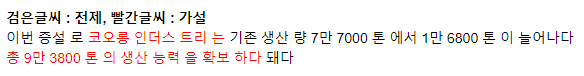

##### **확인🥪🥪**

In [32]:
print(train['premise'][15])
print(train['hypothesis'][15])

상당히 많은 것을 내포하고 있는 영화
인간의 감정에 대한 내용을 내포하고 있는 영화


In [33]:
for word, tag in somelist[15]:
        print(word, end = ' ')

상당하다 많다 것 을 내포 하고 있다 영화 

In [34]:
for word, tag in somelist2[15]: 
        print(word, end = ' ')

인간 의 감정 에 대한 내용 을 내포 하고 있다 영화 

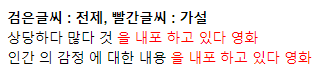

##### **👽 부작용**

In [36]:
train['premise'][2000] #오거?

'한편 세쌍둥이의 아빠가 된 슈렉은 반복되는 일상과 더 이상 무서운 오거가 아닌 사람들의 구경거리로 전락해버린 삶에 염증을 느끼기 시작한다'

**[1]**

In [37]:
train['hypothesis'][2000] #? 쌍동이?

'슈렉은 세쌍동이를 데리고 깊은 산속으로 들어가 숨는다'

In [38]:
for word, tag in somelist[2000]:
        print(word, end = ' ')

한편 세 쌍둥이 의 아빠 가 되다 슈렉 은 반복 되다 일상 과 더 이상 무섭다 오거 가 아니다 사람 들 의 구 경 거리 로 전락 하다 버리다 삶 에 염증 을 느끼다 시작 한 다 

In [39]:
for word, tag in somelist2[2000]: 
        print(word, end = ' ')

슈렉 은 세 쌍 동이 를 데리 고 깊다 산속 으로 들어가다 숨다 

**[2]**

In [42]:
train['premise'][10000]

'종교 재판소는 고야를 이단 혐의로 고발하려 했으나 로렌조 신부는 고야를 위대한 예술가라며 두둔한다'

In [40]:
for word, tag in somelist[10000]: # 음..
        print(word, end = ' ')

종교 재판소 는 곱다 이단 혐의 로 고발 하다 하다 로렌 조 신부 는 곱다 위대하다 예술가 라며 두둔 하다 

고야를 곱다로 잘못 판단하게 된다..

In [41]:
for word, tag in somelist2[10000]: 
        print(word, end = ' ')

곱다 이단 이다 

#### **두번째 물음. 불필요한 단어 제거**

분석에 있어 불필요 하다고 생각되는 부분들 제거

◾ 불용어 제거 <br>
◾ 등장 빈도가 적은 단어 <br>
◾ 길이가 짧은 단어 (but 한글에서는 조금 애매) <br>

#### **훈련셋, 검증셋 분리**

셔플로 바꾸는 방법도 있는데 그냥 내가 임의로 쪼개줌

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids,
                                                                                    labels, 
                                                                                    random_state=2000, 
                                                                                    test_size=0.1)

In [11]:
train_df = train[:20000]
val_df = train[20000:]

In [12]:
val_df = val_df.reset_index(drop=True)
del train_df['index']
del val_df['index']

In [13]:
val_df.head(2)

,premise,hypothesis,label
0,교통시설과 편의 시설이 정말로 가깝다,교통시설과 가깝다,entailment
1,그러던 어느 토요일 오후 이완은 세계 지도를 펼쳐놓고 들여다보던 중 베링 해협이라는...,세계 지도에는 베링 해협이 나와있다,entailment


#### **♠[시작] 토큰화♠**

pretrained 통해 토큰화 진행

In [14]:
! pip install transformers

     |████████████████████████████████| 4.2 MB 5.3 MB/s 
     |████████████████████████████████| 84 kB 2.7 MB/s 
     |████████████████████████████████| 6.6 MB 38.4 MB/s 
     |████████████████████████████████| 596 kB 39.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [15]:
import torch
from transformers import (
    AutoTokenizer,
    TrainingArguments,
    Trainer,
    AutoConfig,
    AutoModelForSequenceClassification,
)

##### **AutoTokenizer.from_pretrained**

로버타 라지가 가장 좋은 성능을 보임 (가장 위도 라지)

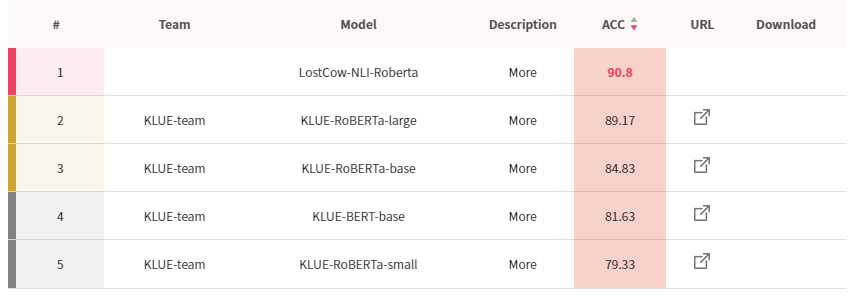

In [16]:
tokenizer = AutoTokenizer.from_pretrained('klue/roberta-base', do_lower_case=False) ##'klue/bert-base'

#** 토큰화는 전제, 가설을 합한 것을 이용 **
## 256에서 128로 변경
inputs =  tokenizer(list(train['premise']),list(train['hypothesis']), return_tensors='pt', max_length=128, truncation=True, padding='max_length')
T_inputs =  tokenizer(list(train_df['premise']),list(train_df['hypothesis']), return_tensors='pt', max_length=128, truncation=True, padding='max_length')
V_inputs =  tokenizer(list(val_df['premise']),list(val_df['hypothesis']), return_tensors='pt', max_length=128, truncation=True, padding='max_length')

Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/243k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/734k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/173 [00:00<?, ?B/s]

inputs = **input_ids, token_type_ids, attention_mask** 한 눈에 볼수 있음 <br>
input.input_ids <br>
input.token_type_ids <br>
input.attention_mask <br>

In [17]:
inputs

{'input_ids': tensor([[    0, 14441,  2073,  ...,     1,     1,     1],
        [    0,  3840,  2073,  ...,     1,     1,     1],
        [    0,  8345,  3627,  ...,     1,     1,     1],
        ...,
        [    0,  3995,  3814,  ...,     1,     1,     1],
        [    0,  1036,  2044,  ...,     1,     1,     1],
        [    0,  1589,  2169,  ...,     1,     1,     1]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [18]:
len(inputs.input_ids[0]) # pad_sequence나 따로 해줄 필요 없음

128

In [19]:
inputs.input_ids[0]

tensor([    0, 14441,  2073, 12382, 13169,  2200,  3797, 21505,  9005,  2259,
         3997,  2031,  2079,  3661, 31221,  5845,  2200,  2112,  5950, 15351,
        17788,  7285,   748,  2088, 22048,  2470,  1132, 21893, 15351,  6481,
        27135,  5417,  4084,  1972,  2145, 17524,  2138, 15526,  2259,   575,
        28674,     2, 14441,  2079,  3883,  2031,  2079,  5845, 28674,     2,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1])

In [20]:
inputs.token_type_ids[0] # 다 0으로 출력됨 오잉?!

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
inputs.token_type_ids[2]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
inputs.attention_mask[0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

##### **데이터로더만들기🤸‍♀️**

inputs에 label이 없어서 추가

In [23]:
class BERTDataset(torch.utils.data.Dataset):
    def __init__(self, pair_dataset, label):
        self.pair_dataset = pair_dataset
        self.label = label

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.pair_dataset.items()}
        item['label'] = torch.tensor(self.label[idx])
        
        return item

    def __len__(self):
        return len(self.label)

In [24]:
def label_to_num(label):
    label_dict = {"entailment": 0, "contradiction": 1, "neutral": 2, "answer": 3}
    num_label = []

    for v in label:
        num_label.append(label_dict[v])
    
    return num_label


train_label = label_to_num(train_df['label'].values)
val_label = label_to_num(val_df['label'].values)

In [25]:
train_label[0]

1

##### **중간점검** 🐣

In [26]:
train_dataset = BERTDataset(T_inputs, train_label)
eval_dataset = BERTDataset(V_inputs, val_label)

In [27]:
train_dataset[0]

{'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]),
 'input_ids': tensor([    0, 14441,  2073, 12382, 13169,  2200,  3797, 21505,  9005,  2259,
          3997,  2031,  2079,  3661, 31221,  5845,  2200,  2112,  5950, 15351,
         17788,  7285,   748,  2088, 22048,  2470,  1132, 21893, 15351,  6481,
         27135,  5417,  4084,  1972,  2145, 17524,  2138, 15526,  2259,   575,
         28674,     2, 14441,  2079,  3883,  2031,  2079,  5845, 28674,     2,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     

##### **중간점검** 🐥

In [28]:
print(train_dataset.__len__())
print(train_dataset.__getitem__(19997))
print(tokenizer.decode(train_dataset.__getitem__(19997)['input_ids']))

20000
{'input_ids': tensor([    0,  4081,  2170,  1513,  2414,  9713,  2031,  2145,  5293,  2031,
         2073, 11217,  2371,  2062,     2,  4081,  2170,  1513,  2414,  9713,
         2031,  2073, 11217,  2371,  2062,     2,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,  

#### **Bert model 불러오기**

ㅎㅎ jupyter notebook으로 작업한다고 cuda 설정을 해줬는데 구글 코랩에서는 무료로 좋은 gpu를 제공해준다.... ㅎㅎ 구글 쵝오 ^.^

In [29]:
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


huggingface에 몰라와 있는 미리 학습된 모델을 내가 불러서 사용한다 <br>
토큰화 할때 썼던 애랑 동일한 애를 불러와야함 ❗❗

In [30]:
MODEL_NAME = 'klue/roberta-base' #'klue/roberta-large' 했는데 안돌아감 ㅠ
                                 #'klue/bert-base'

#tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

config = AutoConfig.from_pretrained(MODEL_NAME)
config.num_labels = 3

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, config=config)
#print(model)
#print(config)

Downloading:   0%|          | 0.00/546 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/422M [00:00<?, ?B/s]

Some weights of the model checkpoint at klue/roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at klue/roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classif

#### **모델 학습 및 acc 확인**

In [32]:
import os
import random
from tqdm import tqdm

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification, AutoConfig, AutoTokenizer

In [33]:
def compute_metrics(pred):
  """ validation을 위한 metrics function """
  labels = pred.label_ids #정답
  preds = pred.predictions.argmax(-1) #예측
  probs = pred.predictions

  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds) # 정답배열과 예측값의 배열

  return {
      'accuracy': acc,
  }

#### **하이퍼파라메타조정**

In [34]:
training_ars = TrainingArguments(
    output_dir='./result',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    #save_strategy='epoch',
    #logging_strategy='epoch',
    num_train_epochs=5, #5
    per_device_train_batch_size=32, 
    per_device_eval_batch_size=32,
    #save_total_limit=2,
    #gradient_accumulation_steps=2,
    weight_decay=0.01
    #save_steps=500,
    #evaluation_strategy='epoch',
    #load_best_model_at_end = True,
)

trainer = Trainer(
    model=model,
    args=training_ars,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

#### **🌮학습완료!!!!! val acc 확인 'v'🌮**

In [35]:
trainer.train()
model.save_pretrained('./result/best_model')

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 20000
  Num Epochs = 5
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 3125


Epoch,Training Loss,Validation Loss,Accuracy
1,0.675700,0.406102,0.849140
2,0.344700,0.415393,0.854342
3,0.245200,0.490547,0.864746
4,0.108400,0.572923,0.870548
5,0.065000,0.639691,0.869948


Saving model checkpoint to ./result/checkpoint-500
Configuration saved in ./result/checkpoint-500/config.json
Model weights saved in ./result/checkpoint-500/pytorch_model.bin
tokenizer config file saved in ./result/checkpoint-500/tokenizer_config.json
Special tokens file saved in ./result/checkpoint-500/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 4998
  Batch size = 32
Saving model checkpoint to ./result/checkpoint-1000
Configuration saved in ./result/checkpoint-1000/config.json
Model weights saved in ./result/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in ./result/checkpoint-1000/tokenizer_config.json
Special tokens file saved in ./result/checkpoint-1000/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 4998
  Batch size = 32
Saving model checkpoint to ./result/checkpoint-1500
Configuration saved in ./result/checkpoint-1500/config.json
Model weights saved in ./result/checkpoint-1500/pytorch_model.bin
tokenizer config 

In [36]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 4998
  Batch size = 32


{'epoch': 5.0,
 'eval_accuracy': 0.8699479791916767,
 'eval_loss': 0.6396914720535278,
 'eval_runtime': 66.7689,
 'eval_samples_per_second': 74.855,
 'eval_steps_per_second': 2.351}

#### **acc가 가장 좋은**

In [37]:
Tokenizer_NAME = 'klue/roberta-base'
tokenizer = AutoTokenizer.from_pretrained(Tokenizer_NAME)

MODEL_NAME = './result/checkpoint-3000'
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
model.resize_token_embeddings(tokenizer.vocab_size)
model.to(device)

print(tokenizer)

loading file https://huggingface.co/klue/roberta-base/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/e8441a174492958462b6b16b6db8f1e7253cd149ca779522cadd812d55091b89.d1b86bed49516351c7bb29b19d7e7be2ab53b931bcb1f9b2aacfb71f2124d25a
loading file https://huggingface.co/klue/roberta-base/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/233a5b2c17873a8477b62dd92a02092a9937759e924a5f22b111becebb8aba5e.44c30ade4958fcfd446e66025e10a5b380cdd0bbe9b3fb7a794f357e7f0f34c2
loading file https://huggingface.co/klue/roberta-base/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/klue/roberta-base/resolve/main/special_tokens_map.json from cache at /root/.cache/huggingface/transformers/9d0c87e44b00acfbfbae931b2e4068eb6311a0c3e71e23e5400bdf57cab4bfbf.70c17d6e4d492c8f24f5bb97ab56c7f272e947112c6faf9dd846da42ba13eb23
loading file https://huggingface.co/klue/roberta-base/resolve/main/tokenizer_config.json from cache 

PreTrainedTokenizerFast(name_or_path='klue/roberta-base', vocab_size=32000, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '[CLS]', 'eos_token': '[SEP]', 'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})


#### **테스트셋 평가**

In [38]:
test_label = label_to_num(test['label'].values)

tokenized_test = tokenizer(
    list(test['premise']),
    list(test['hypothesis']),
    return_tensors="pt",
    max_length=128,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

test_dataset = BERTDataset(tokenized_test, test_label)

print(test_dataset.__len__())
print(test_dataset.__getitem__(1665))
print(tokenizer.decode(test_dataset.__getitem__(6)['input_ids']))

1666
{'input_ids': tensor([    0,   720,  3994,  2052, 10428,  2775,   647,  3657,  2119,  1085,
            3,     2,   720,  3994,  2052,   911,  2075,  3669,  2119,  3926,
         2088,  1513,  2359, 13964,     2,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [39]:
dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False) #배치사이즈? 16

model.eval()
output_pred = []
output_prob = []

for i, data in enumerate(tqdm(dataloader)):
    with torch.no_grad():
        outputs = model(
            input_ids=data['input_ids'].to(device),
            attention_mask=data['attention_mask'].to(device),
            token_type_ids=data['token_type_ids'].to(device)
        )
    logits = outputs[0]
    prob = F.softmax(logits, dim=-1).detach().cpu().numpy()
    logits = logits.detach().cpu().numpy()
    result = np.argmax(logits, axis=-1)

    output_pred.append(result)
    output_prob.append(prob)
  
pred_answer, output_prob = np.concatenate(output_pred).tolist(), np.concatenate(output_prob, axis=0).tolist()
print(pred_answer)

100%|██████████| 105/105 [00:17<00:00,  6.13it/s]

[1, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 1, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 1, 1, 2, 2, 1, 0, 2, 1, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 0, 

In [40]:
def num_to_label(label):
    label_dict = {0: "entailment", 1: "contradiction", 2: "neutral"}
    str_label = []

    for i, v in enumerate(label):
        str_label.append([i,label_dict[v]])
    
    return str_label

answer = num_to_label(pred_answer)
print(answer)

[[0, 'contradiction'], [1, 'neutral'], [2, 'entailment'], [3, 'contradiction'], [4, 'entailment'], [5, 'neutral'], [6, 'neutral'], [7, 'entailment'], [8, 'entailment'], [9, 'neutral'], [10, 'contradiction'], [11, 'entailment'], [12, 'contradiction'], [13, 'entailment'], [14, 'neutral'], [15, 'neutral'], [16, 'contradiction'], [17, 'neutral'], [18, 'contradiction'], [19, 'neutral'], [20, 'contradiction'], [21, 'neutral'], [22, 'neutral'], [23, 'entailment'], [24, 'contradiction'], [25, 'contradiction'], [26, 'entailment'], [27, 'entailment'], [28, 'entailment'], [29, 'neutral'], [30, 'contradiction'], [31, 'entailment'], [32, 'contradiction'], [33, 'neutral'], [34, 'neutral'], [35, 'contradiction'], [36, 'neutral'], [37, 'contradiction'], [38, 'entailment'], [39, 'contradiction'], [40, 'neutral'], [41, 'entailment'], [42, 'contradiction'], [43, 'neutral'], [44, 'neutral'], [45, 'contradiction'], [46, 'neutral'], [47, 'entailment'], [48, 'contradiction'], [49, 'entailment'], [50, 'neutra

#### **결과**

In [41]:
df = pd.DataFrame(answer, columns=['index', 'label'])
df.to_csv('./result/submission.csv', index=False)

print(df)

      index          label
0         0  contradiction
1         1        neutral
2         2     entailment
3         3  contradiction
4         4     entailment
...     ...            ...
1661   1661        neutral
1662   1662     entailment
1663   1663        neutral
1664   1664        neutral
1665   1665        neutral

[1666 rows x 2 columns]
